In [1]:
import pandas as pd
import numpy as np

import os.path

training_data = pd.read_parquet(os.path.join("data", "training.parquet"))

In [2]:
training_data.sample(10)

,Category,Text
3916,alt.atheism,In article <C5zu3K.FzD@news.cso.uiuc.edu> cobb...
19472,talk.religion.misc,In article <C5rLnE.4pC@murdoch.acc.Virginia.ED...
10126,rec.motorcycles,"In article 735328328@bdrc.bd.com, Clarke@bdrc...."
957,talk.politics.mideast,"In today's Israeline posting, at the end (an a..."
14902,sci.electronics,clewis@ferret.ocunix.on.ca (Chris Lewis) write...
14819,sci.electronics,=========================================...
10317,rec.motorcycles,In article <1993Apr2.045903.6066@spectrum.xero...
5012,comp.os.ms-windows.misc,"\nHi.\n \n Well, I really hate to make a de..."
7217,sci.crypt,In article <1993Apr26.104320.10398@infodev.cam...
7325,sci.crypt,A Unix tool of cryptographic significance is a...


In [3]:
import cloudpickle as cp
feature_pipeline = cp.load(open('feature_pipeline.sav', 'rb'))

In [4]:
train_vecs = feature_pipeline.fit_transform(training_data["Text"])
train_vecs

<13947x2048 sparse matrix of type '<class 'numpy.float64'>'
	with 1236563 stored elements in Compressed Sparse Row format>

In [5]:
from sklearn import naive_bayes

In [6]:
nb=naive_bayes.MultinomialNB()

nb.fit(train_vecs, training_data["Category"])

MultinomialNB()

In [7]:
nb.score(train_vecs, training_data["Category"])

0.8553093855309386

In [8]:
testing_data = pd.read_parquet(os.path.join("data", "testing.parquet"))
testing_vecs=feature_pipeline.transform(testing_data["Text"])

In [9]:
testing_vecs

<5977x2048 sparse matrix of type '<class 'numpy.float64'>'
	with 521556 stored elements in Compressed Sparse Row format>

In [10]:
nb.score(testing_vecs, testing_data["Category"])

0.785009201940773

In [11]:
from mlworkflows import plot

In [12]:
df, chart =plot.confusion_matrix(testing_data.Category, nb.predict(testing_vecs))

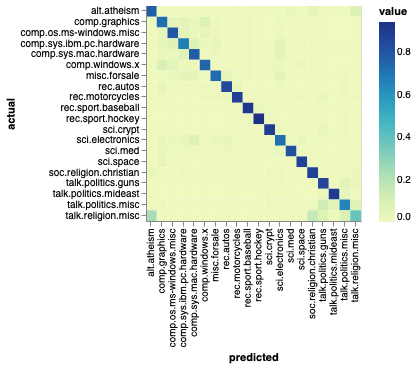

In [13]:
chart

In [14]:
from sklearn.metrics import classification_report
print(classification_report(testing_data.Category, nb.predict(testing_vecs)))

                          precision    recall  f1-score   support

             alt.atheism       0.69      0.77      0.73       284
           comp.graphics       0.67      0.72      0.69       303
 comp.os.ms-windows.misc       0.74      0.79      0.77       293
comp.sys.ibm.pc.hardware       0.67      0.67      0.67       303
   comp.sys.mac.hardware       0.74      0.77      0.76       286
          comp.windows.x       0.76      0.74      0.75       280
            misc.forsale       0.83      0.72      0.78       305
               rec.autos       0.82      0.84      0.83       300
         rec.motorcycles       0.90      0.87      0.88       317
      rec.sport.baseball       0.90      0.91      0.91       291
        rec.sport.hockey       0.95      0.94      0.94       310
               sci.crypt       0.88      0.89      0.88       303
         sci.electronics       0.67      0.71      0.69       274
                 sci.med       0.89      0.81      0.85       314
         